In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import csv

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 16),  # Input size is 2 (latent space)
            nn.LeakyReLU(0.2),
            nn.Linear(16, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 2)  # Output size should be 2 for 2D data
        )

    def forward(self, input):
        return self.main(input)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 16),  # Input size should match the generated data size
            nn.LeakyReLU(0.2),
            nn.Linear(16, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1)  # Output size is 1 for binary classification
        )

    def forward(self, input):
        return self.main(input)

# Create instances of the generator and discriminator and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizers
gen_optimizer = optim.RMSprop(generator.parameters(), lr=0.001)
disc_optimizer = optim.RMSprop(discriminator.parameters(), lr=0.001)

# Function to generate noise
def sample_Z(m, n):
    return torch.Tensor(np.random.uniform(-1., 1., size=[m, n])).to(device)

# Load training data from m_hist.txt
def load_data(file_path):
    # Load only the first two columns to avoid dimension mismatch
    data = np.loadtxt(file_path, usecols=[0, 1])  
    return torch.Tensor(data).to(device)

# Load your real training data
real_data_file = '/home/jovyan/plots-gan/basic-gans/code/m_hist.txt'  # Full path to your data file
x_plot = load_data(real_data_file)

# Training parameters
batch_size = min(256, len(x_plot))  # Adjust batch size to be smaller than or equal to the number of data points
nd_steps = 10
ng_steps = 10
num_iterations = 12001  # Set to 12000 iterations

# Path to the loss log file
loss_log_file = '../plots/loss_log.csv'

# Write the header of the CSV file
with open(loss_log_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Iteration', 'Discriminator Loss', 'Generator Loss'])

# Training loop
for i in range(num_iterations):
    for _ in range(nd_steps):
        # Sample a batch of real data
        indices = np.random.choice(len(x_plot), batch_size, replace=False)
        X_batch = x_plot[indices]
        Z_batch = sample_Z(batch_size, 2)

        # Real data labels are 1, generated data labels are 0
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Compute discriminator loss on real data
        real_outputs = discriminator(X_batch)
        real_loss = criterion(real_outputs, real_labels)

        # Compute discriminator loss on fake data
        fake_data = generator(Z_batch)
        fake_outputs = discriminator(fake_data.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        # Total discriminator loss
        disc_loss = real_loss + fake_loss

        # Backpropagation and optimization for discriminator
        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()

    for _ in range(ng_steps):
        Z_batch = sample_Z(batch_size, 2)
        fake_data = generator(Z_batch)
        fake_outputs = discriminator(fake_data)

        # Generator loss
        gen_loss = criterion(fake_outputs, real_labels)

        # Backpropagation and optimization for generator
        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()

    # Save the losses to the CSV file
    with open(loss_log_file, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([i, disc_loss.item(), gen_loss.item()])

    print(f"Iterations: {i}\t Discriminator loss: {disc_loss.item():.4f}\t Generator loss: {gen_loss.item():.4f}")

    # Plotting every 1000 iterations
    if i % 1000 == 0:
        plt.figure()
        with torch.no_grad():
            g_plot = generator(sample_Z(batch_size, 2)).cpu().numpy()  # Generate new data for plotting
        plt.scatter(x_plot.cpu()[:, 0], x_plot.cpu()[:, 1], color='blue', label='Real Data', alpha=0.6)
        plt.scatter(g_plot[:, 0], g_plot[:, 1], color='orange', label='Generated Data', alpha=0.6)

        plt.legend()
        plt.title(f'Samples at Iteration {i}', fontsize=14)
        plt.xlabel('X-axis Label', fontsize=12)
        plt.ylabel('Y-axis Label', fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'../plots/iterations/iteration_{i}.png', dpi=300)
        plt.close()


FileNotFoundError: /home/jovyan/plots-gan/basic-gans/code/m_hist.txt not found.

Iter 0 | Disc Loss: 1.2025 | Gen Loss: 0.5511


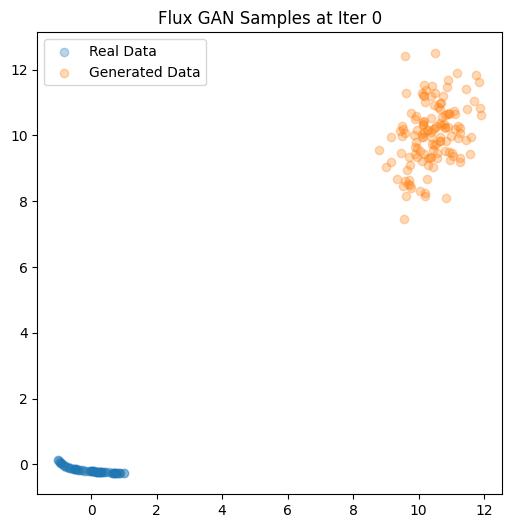

Iter 500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


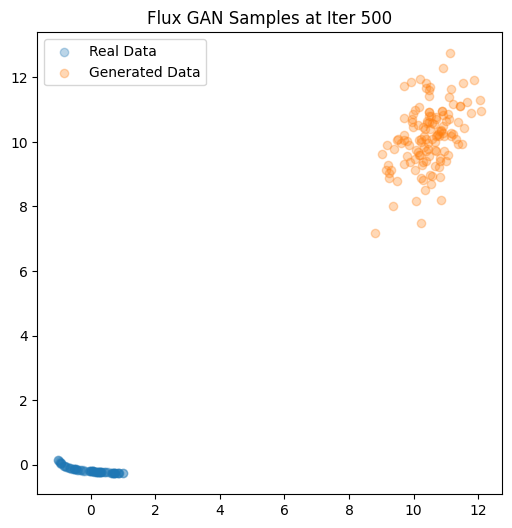

Iter 1000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


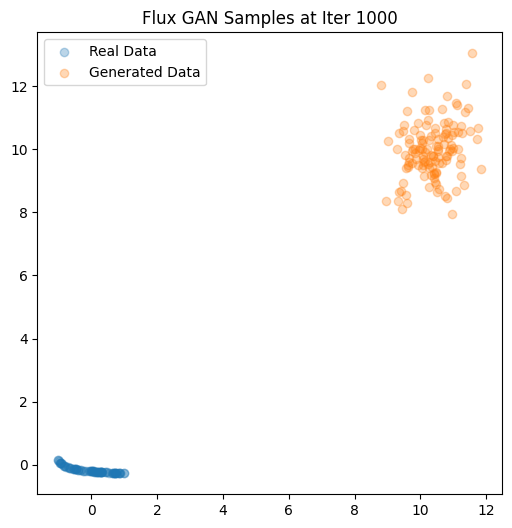

Iter 1500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


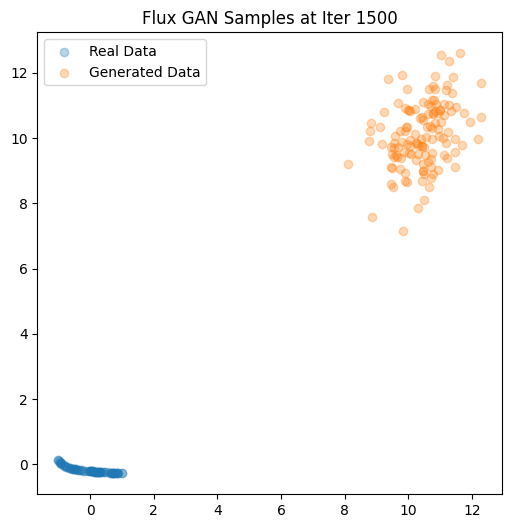

Iter 2000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


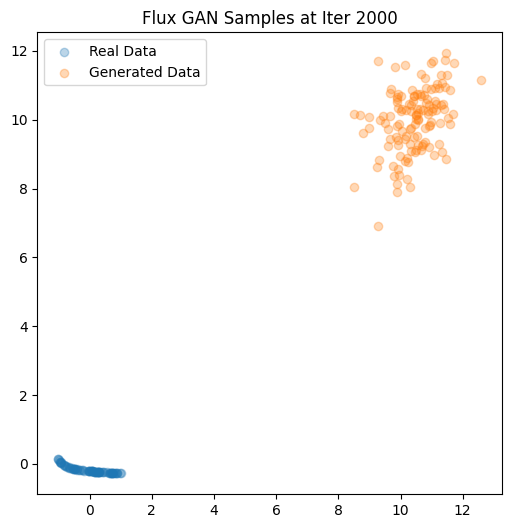

Iter 2500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


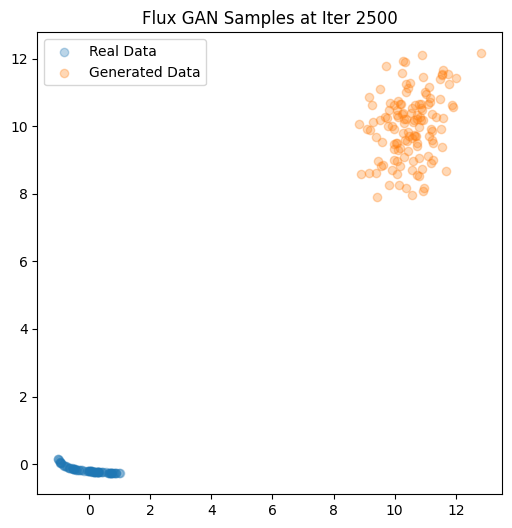

Iter 3000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


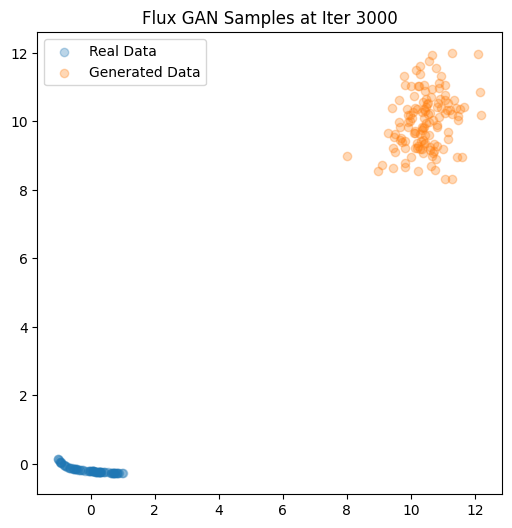

Iter 3500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


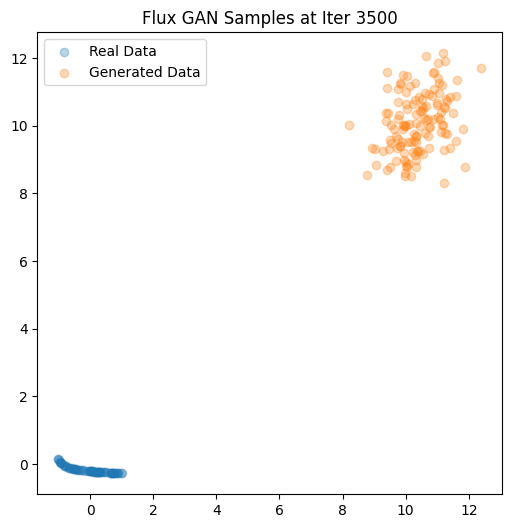

Iter 4000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


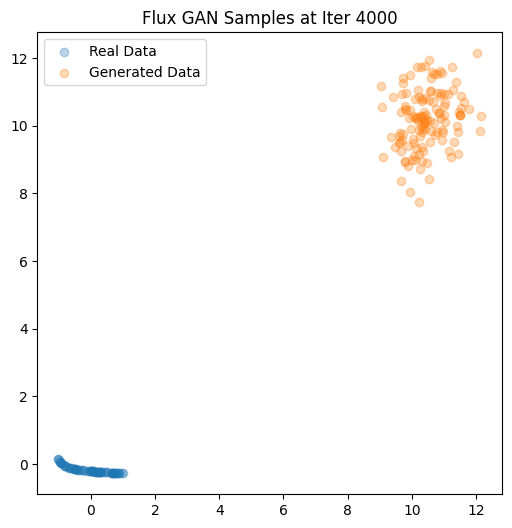

Iter 4500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


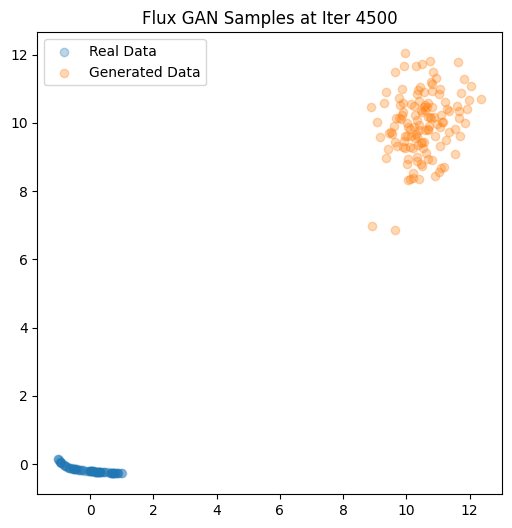

Iter 5000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


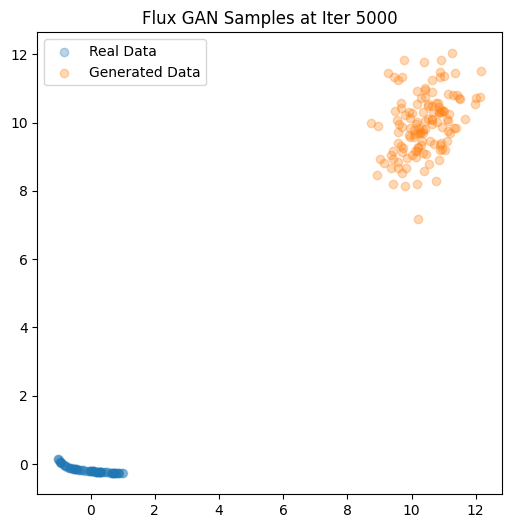

Iter 5500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


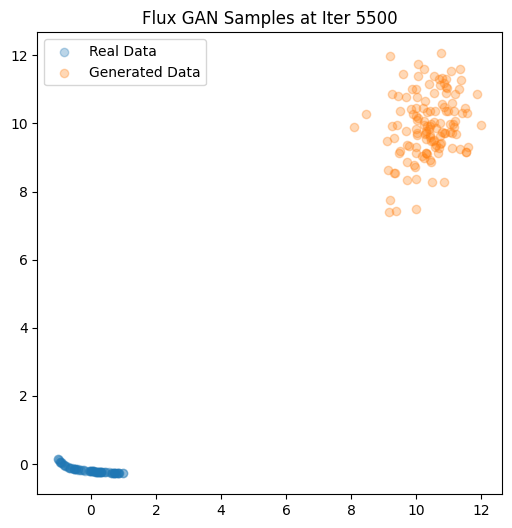

Iter 6000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


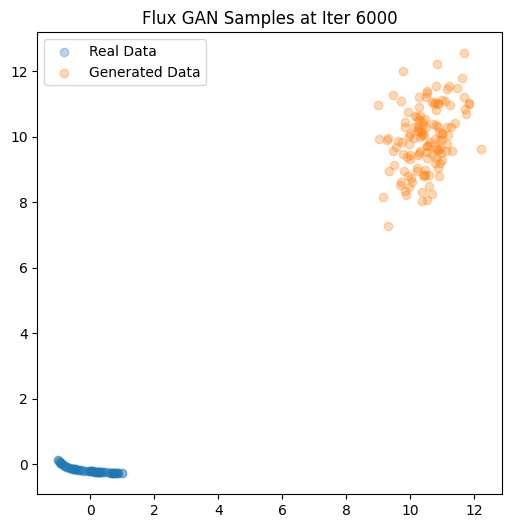

Iter 6500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


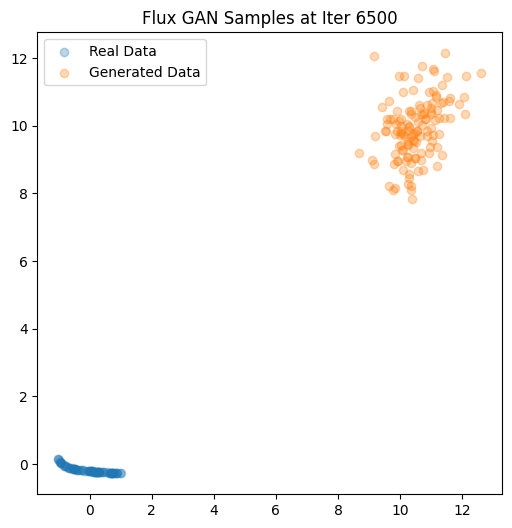

Iter 7000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


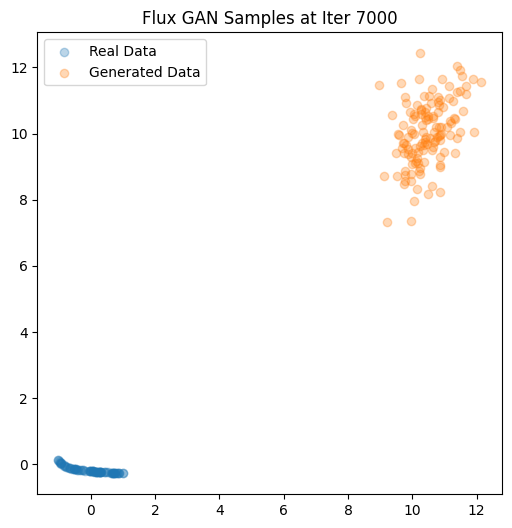

Iter 7500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


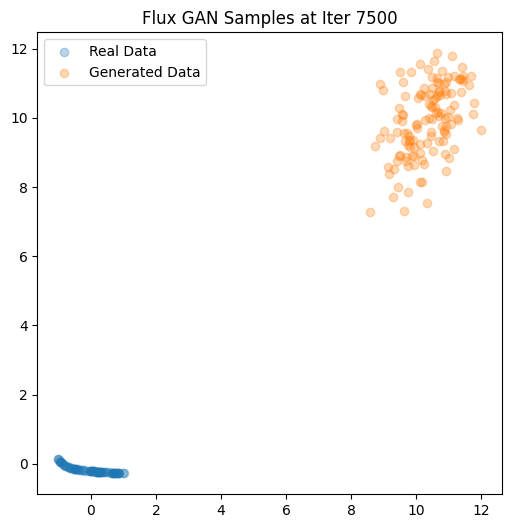

Iter 8000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


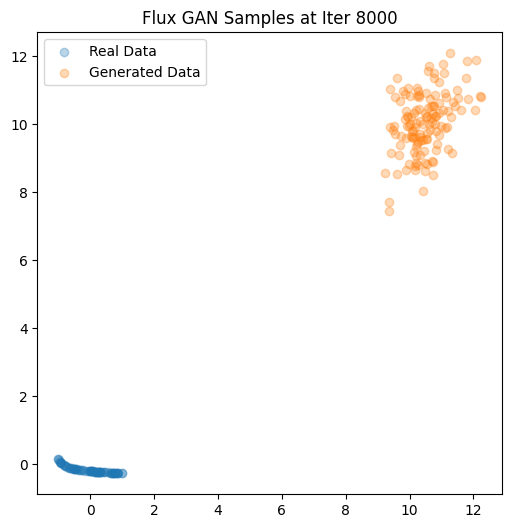

Iter 8500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


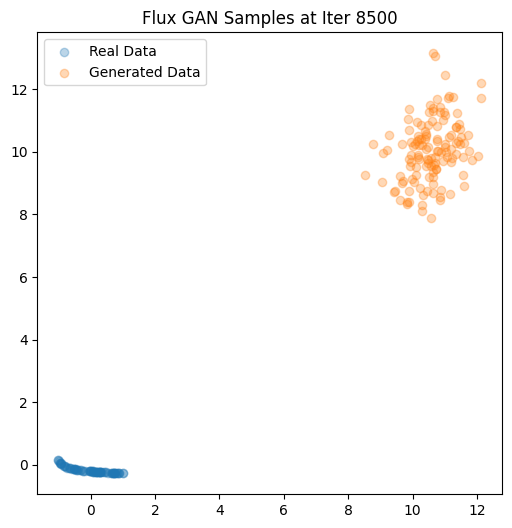

Iter 9000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


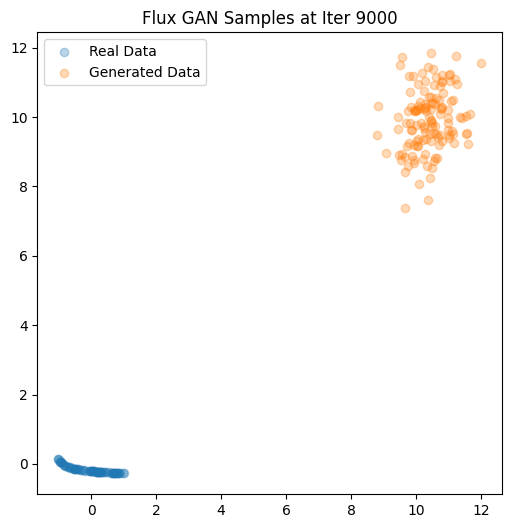

Iter 9500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


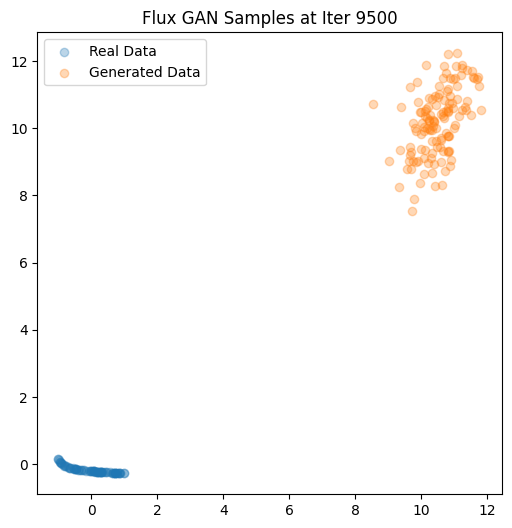

Iter 10000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


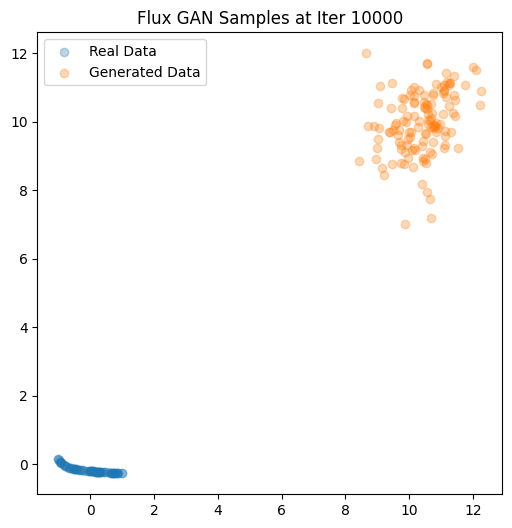

Iter 10500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


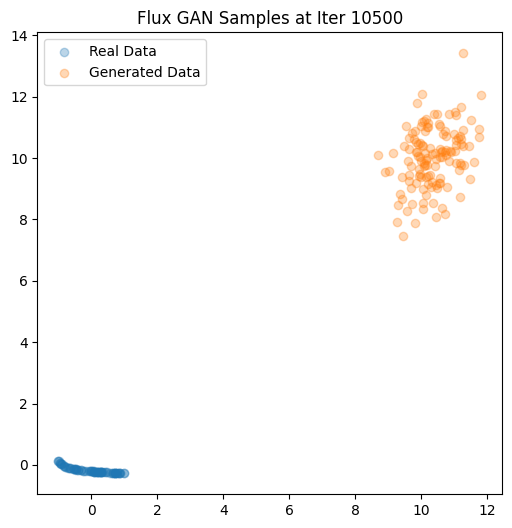

Iter 11000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


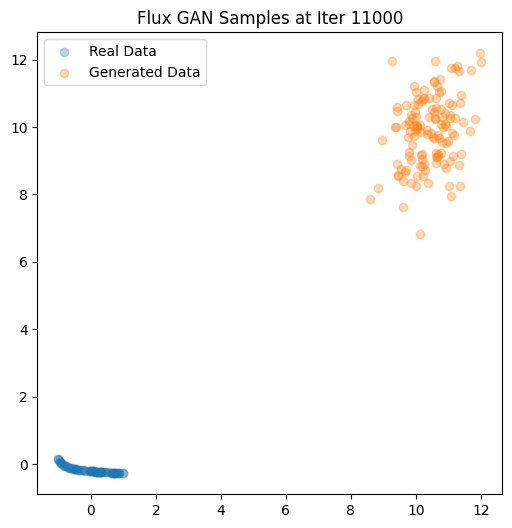

Iter 11500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


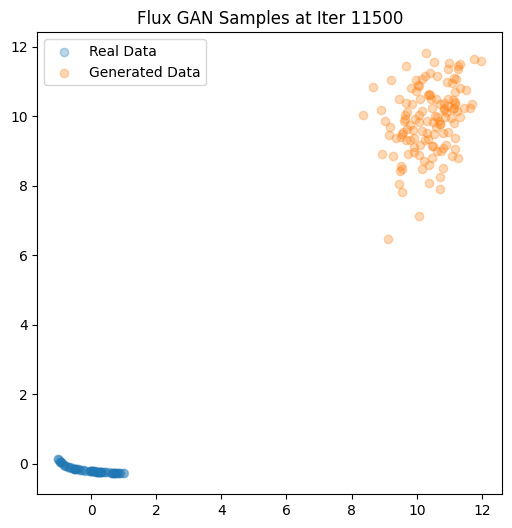

Iter 12000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


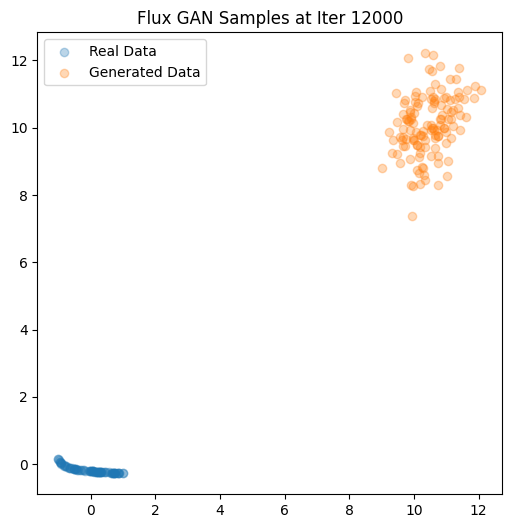

Iter 12500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


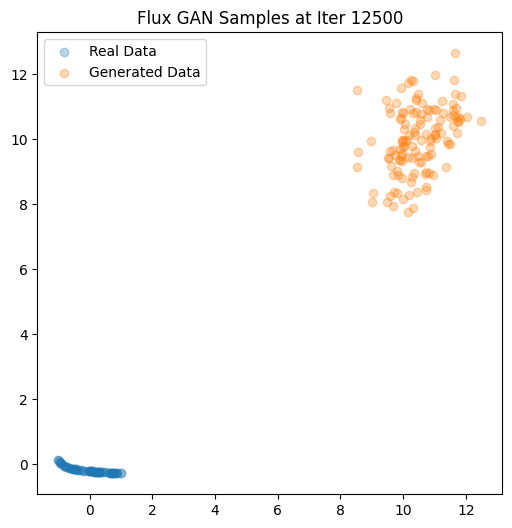

Iter 13000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


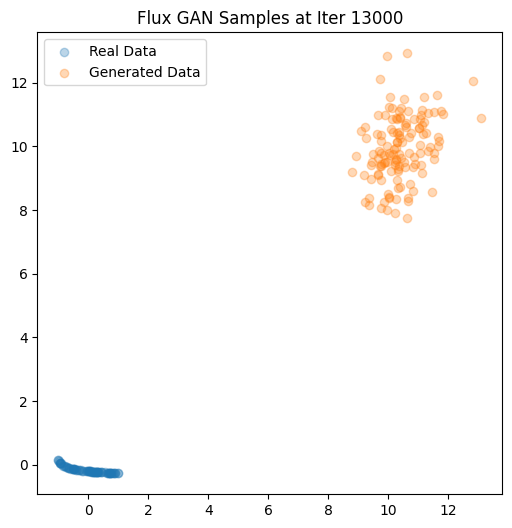

Iter 13500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


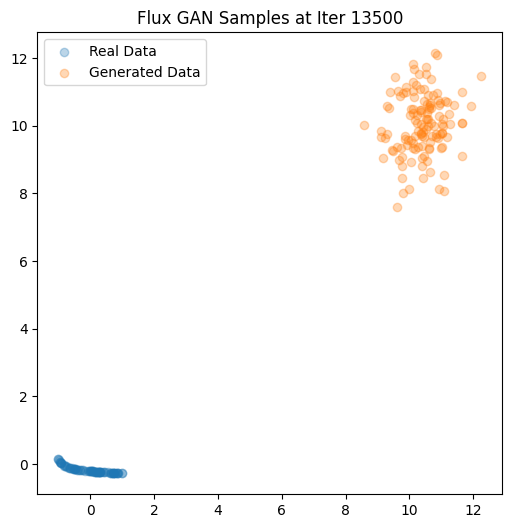

Iter 14000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


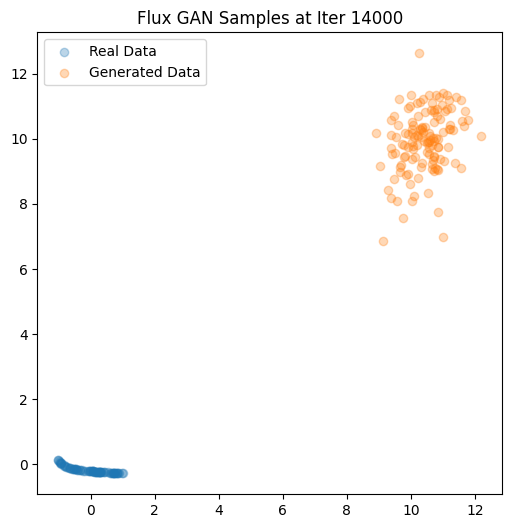

Iter 14500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


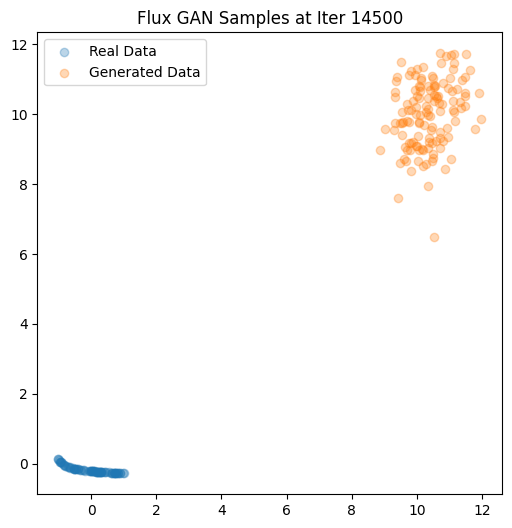

Iter 15000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


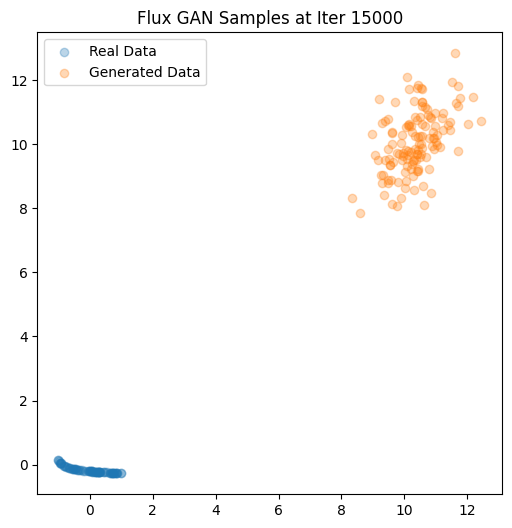

Iter 15500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


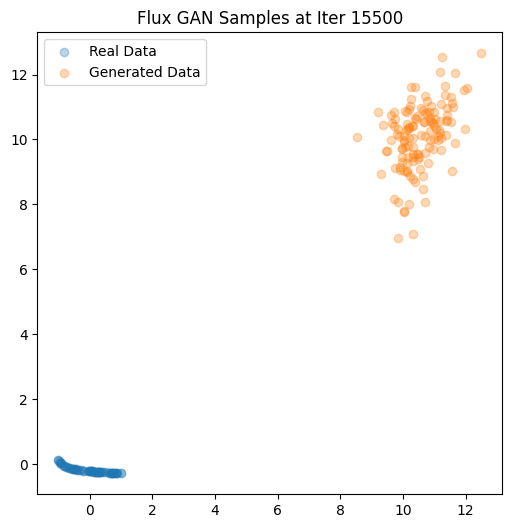

Iter 16000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


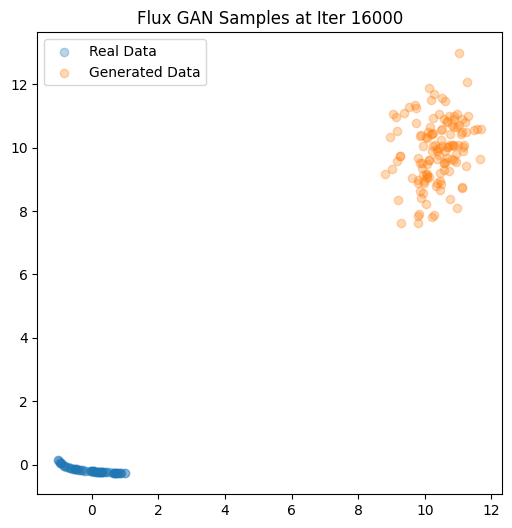

Iter 16500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


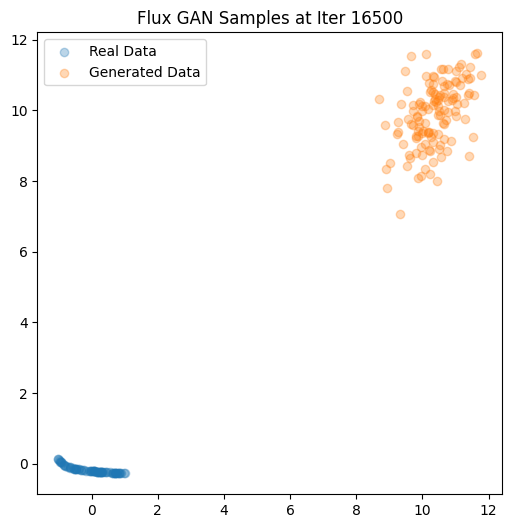

Iter 17000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


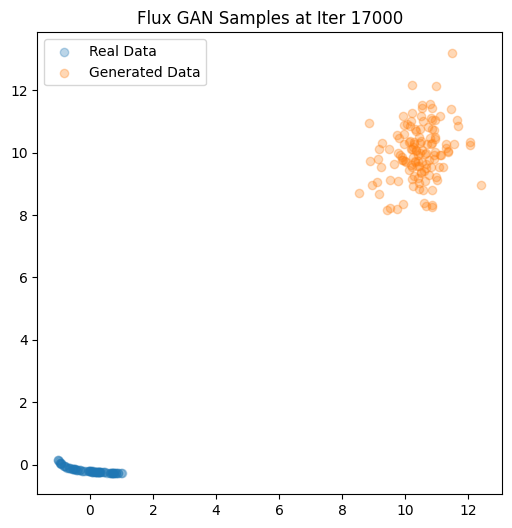

Iter 17500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


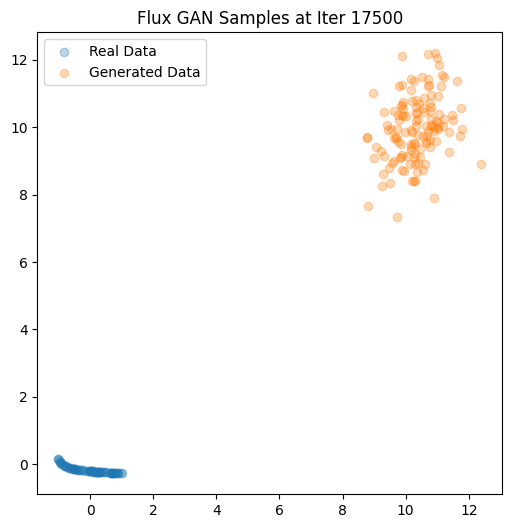

Iter 18000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


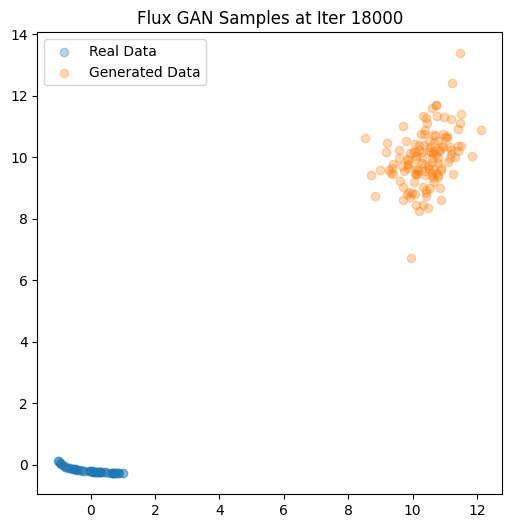

Iter 18500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


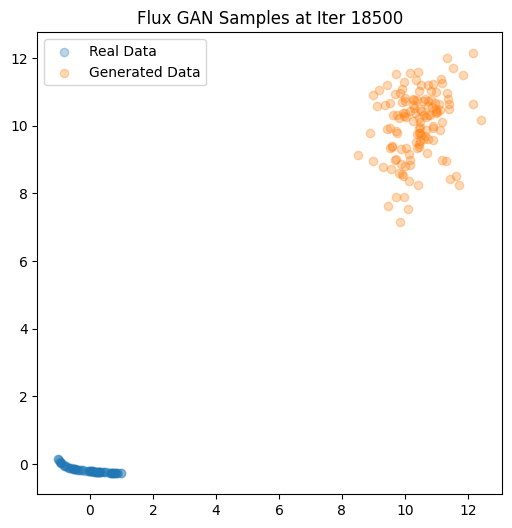

Iter 19000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


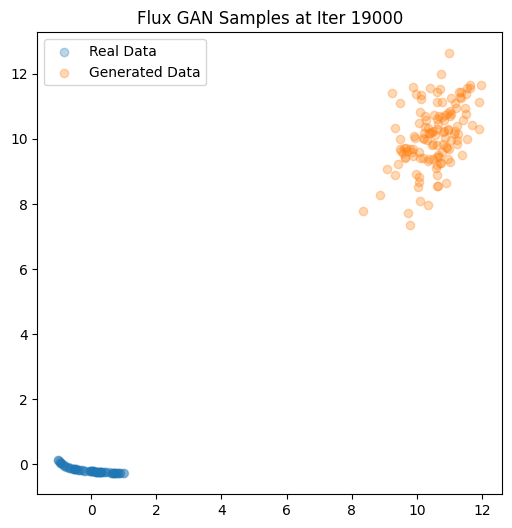

Iter 19500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


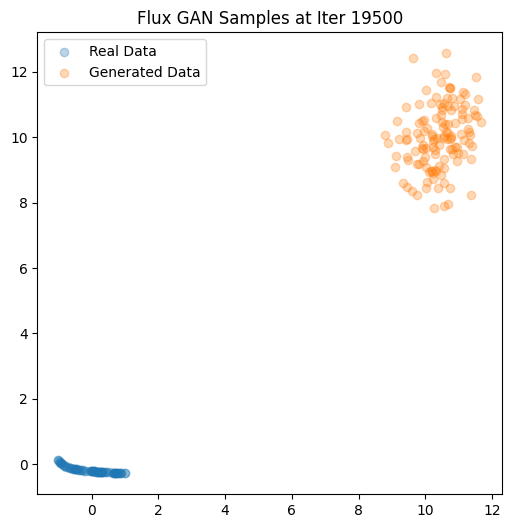

Iter 20000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


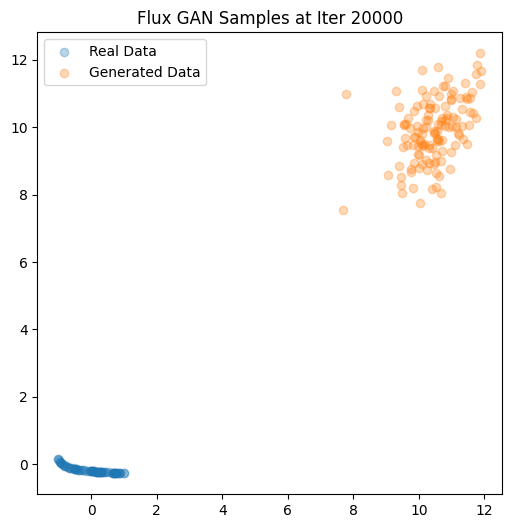

Iter 20500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


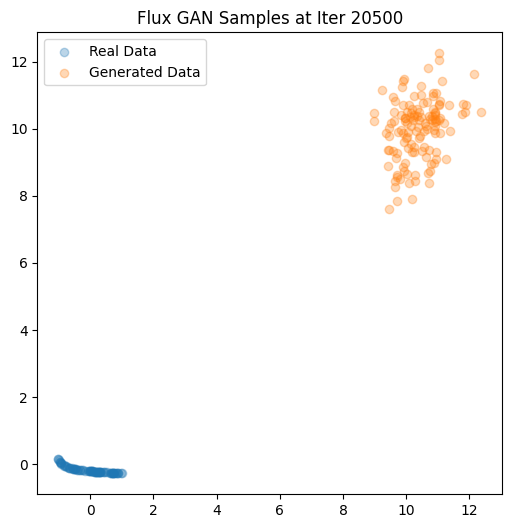

Iter 21000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


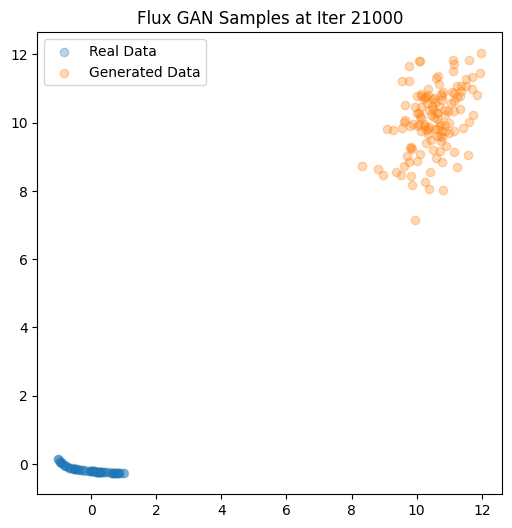

Iter 21500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


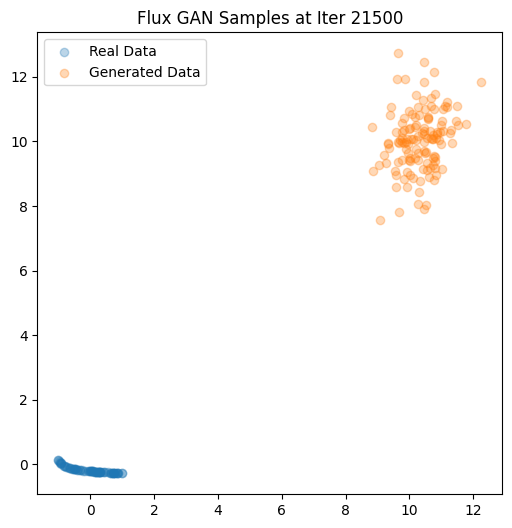

Iter 22000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


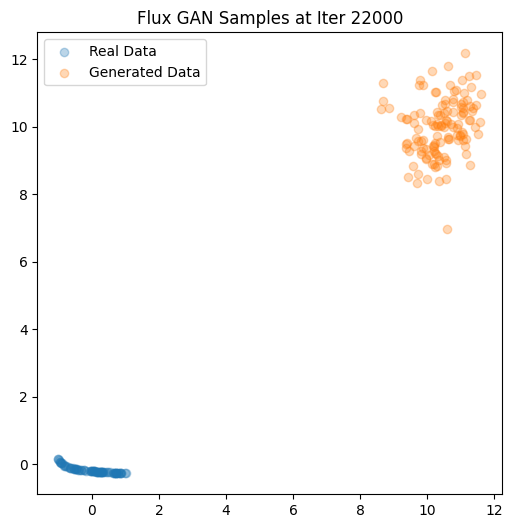

Iter 22500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


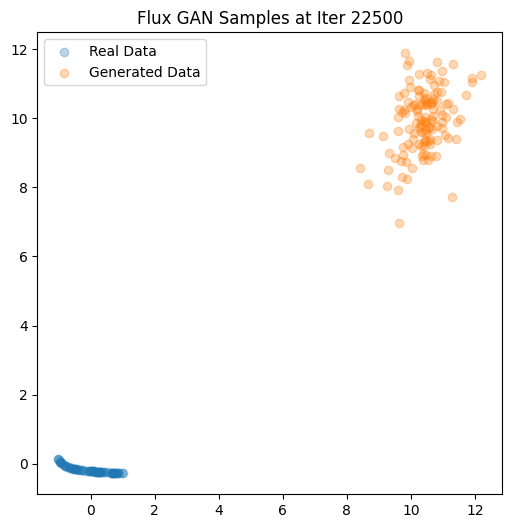

Iter 23000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


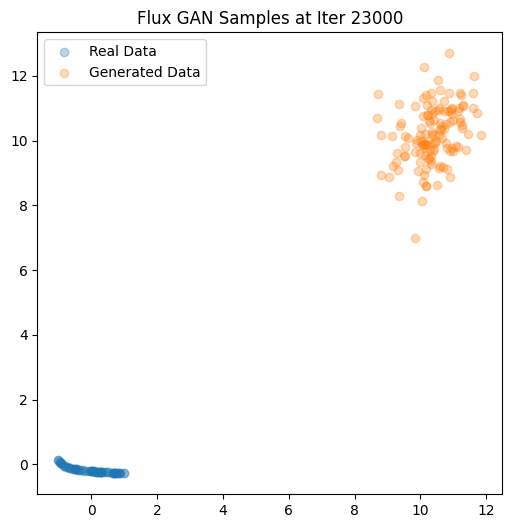

Iter 23500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


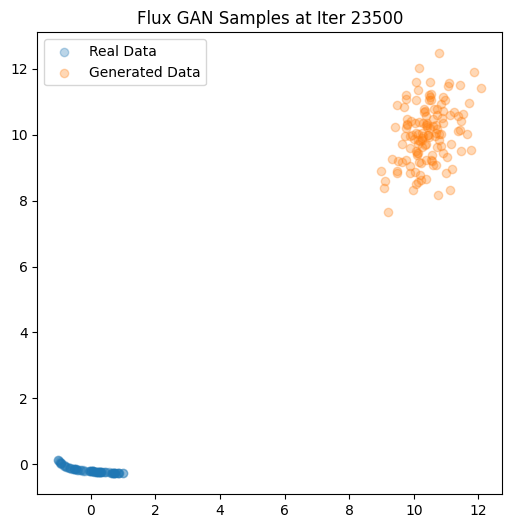

Iter 24000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


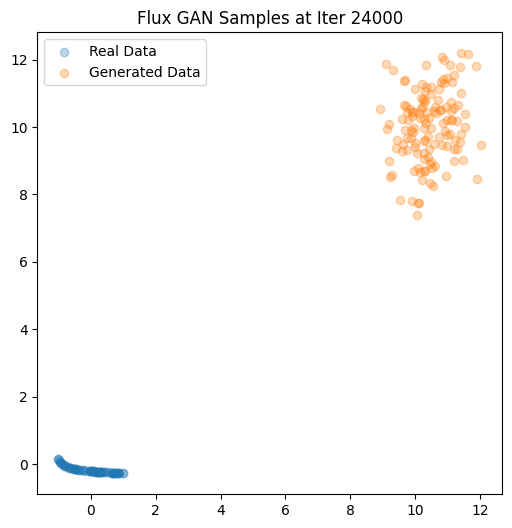

Iter 24500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


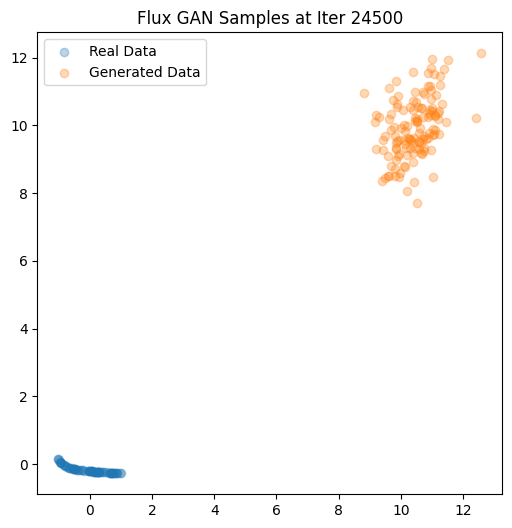

Iter 25000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


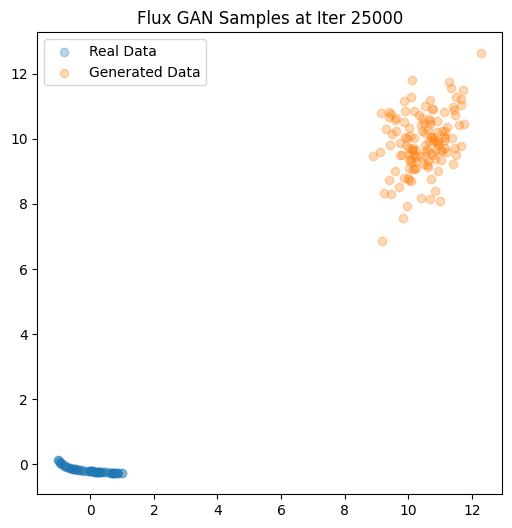

Iter 25500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


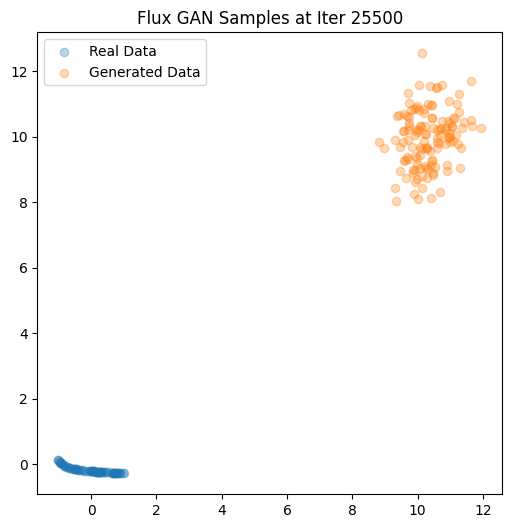

Iter 26000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


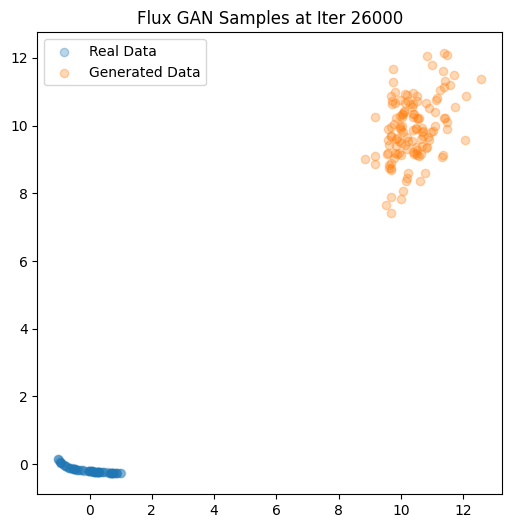

Iter 26500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


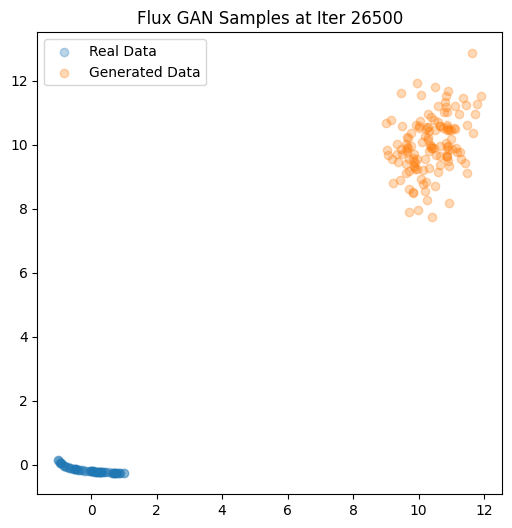

Iter 27000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


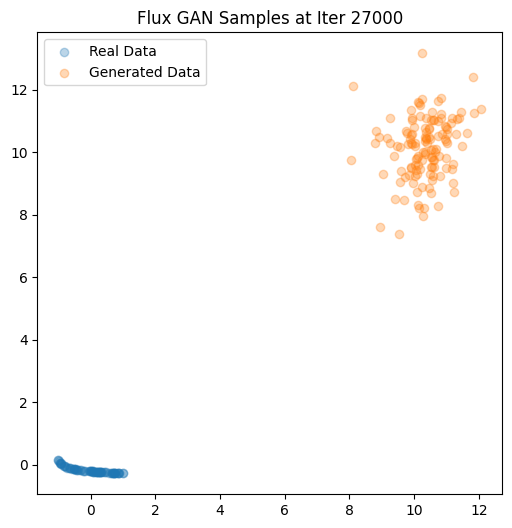

Iter 27500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


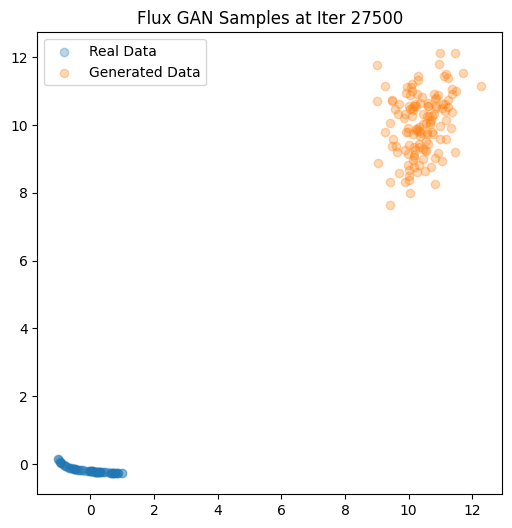

Iter 28000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


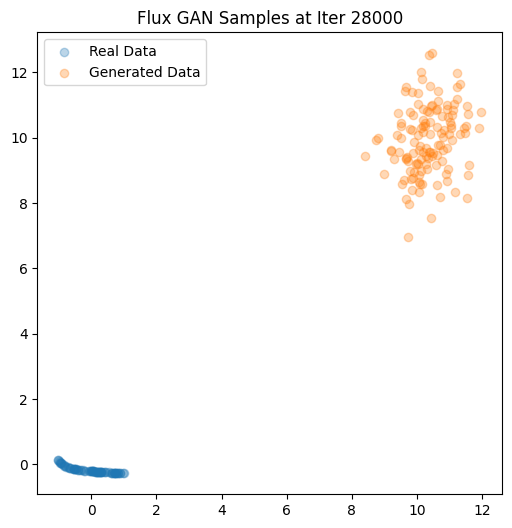

Iter 28500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


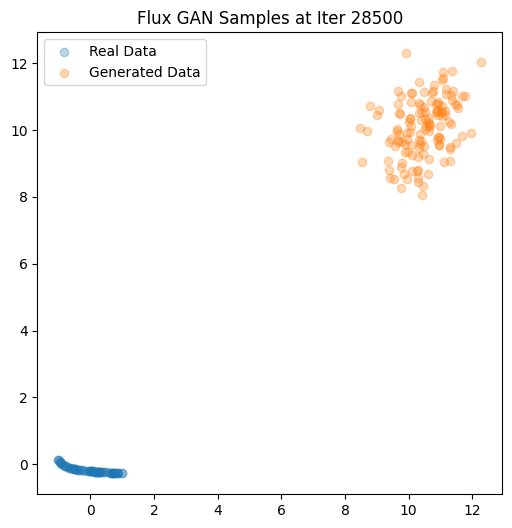

Iter 29000 | Disc Loss: 1.2025 | Gen Loss: 0.5511


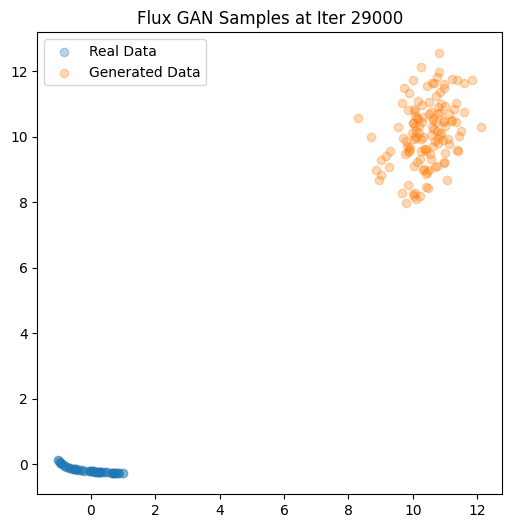

Iter 29500 | Disc Loss: 1.2025 | Gen Loss: 0.5511


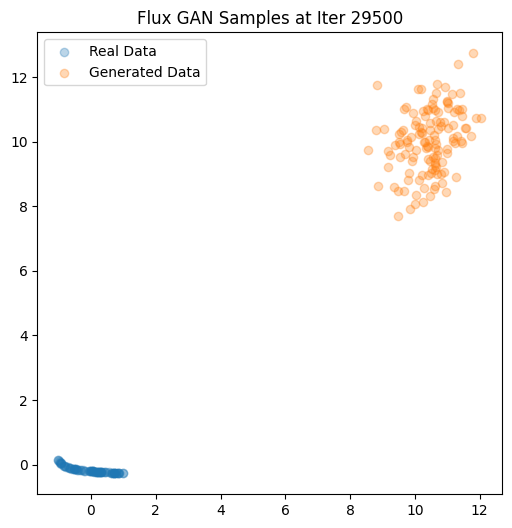

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Hyperparameters ---
latent_dim = 32  # latent space dimension
hidden_dim = 128  # neurons per hidden layer
batch_size = 128
num_iterations = 30000
lr = 0.0002
beta1, beta2 = 0.5, 0.999  # Adam betas

# --- Generator ---
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),

            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),

            nn.Linear(hidden_dim, output_dim),
            # No activation here if output can have negative or large values
        )

    def forward(self, z):
        return self.net(z)

# --- Discriminator ---
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),

            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),

            nn.Linear(hidden_dim, 1)
            # Output logits (no sigmoid here because we use BCEWithLogitsLoss)
        )

    def forward(self, x):
        return self.net(x)

# --- Load and Prepare Data ---
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',')
    data_tensor = torch.tensor(data, dtype=torch.float32)
    # Normalize data between -1 and 1 for stable training
    min_val = data_tensor.min()
    max_val = data_tensor.max()
    data_tensor = 2 * (data_tensor - min_val) / (max_val - min_val) - 1
    return data_tensor.to(device), min_val, max_val

real_data_file = '/home/jovyan/Muon_decay_GAN/GAN/code/m_hist.txt'
real_data, data_min, data_max = load_data(real_data_file)

dataset = TensorDataset(real_data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

data_dim = real_data.shape[1]  # output dimension

# --- Instantiate models ---
generator = Generator(latent_dim, data_dim).to(device)
discriminator = Discriminator(data_dim).to(device)

# --- Optimizers ---
gen_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
disc_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

# --- Loss ---
criterion = nn.BCEWithLogitsLoss()

# --- Training Loop ---
for iteration in range(num_iterations):
    for real_batch_tuple in dataloader:
        real_batch = real_batch_tuple[0].to(device)

        batch_size_curr = real_batch.size(0)

        # Labels with smoothing
        real_labels = torch.full((batch_size_curr, 1), 0.9, device=device)
        fake_labels = torch.zeros((batch_size_curr, 1), device=device)

        # --- Train Discriminator ---
        disc_optimizer.zero_grad()

        # Real data
        real_preds = discriminator(real_batch)
        real_loss = criterion(real_preds, real_labels)

        # Fake data
        z = torch.randn(batch_size_curr, latent_dim, device=device)
        fake_data = generator(z)
        fake_preds = discriminator(fake_data.detach())
        fake_loss = criterion(fake_preds, fake_labels)

        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        disc_optimizer.step()

        # --- Train Generator ---
        gen_optimizer.zero_grad()

        z = torch.randn(batch_size_curr, latent_dim, device=device)
        fake_data = generator(z)
        fake_preds = discriminator(fake_data)
        # We want generator to fool discriminator, so labels are real
        gen_loss = criterion(fake_preds, real_labels)

        gen_loss.backward()
        gen_optimizer.step()

    if iteration % 500 == 0:
        print(f"Iter {iteration} | Disc Loss: {disc_loss.item():.4f} | Gen Loss: {gen_loss.item():.4f}")

        # Generate some samples for visualization
        generator.eval()
        with torch.no_grad():
            z = torch.randn(batch_size, latent_dim, device=device)
            generated_samples = generator(z).cpu()

            # Rescale to original range for plotting
            generated_samples = (generated_samples + 1) / 2  # scale back to [0,1]
            generated_samples = generated_samples * (data_max - data_min) + data_min

        plt.figure(figsize=(6, 6))
        plt.scatter(real_data.cpu()[:, 0], real_data.cpu()[:, 1], alpha=0.3, label="Real Data")
        plt.scatter(generated_samples[:, 0], generated_samples[:, 1], alpha=0.3, label="Generated Data")
        plt.legend()
        plt.title(f"Flux GAN Samples at Iter {iteration}")
        plt.show()
        generator.train()


'/home/jovyan/Muon_decay_GAN/GAN/code'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 2),
        )

    def forward(self, input):
        return self.main(input)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1),
        )

    def forward(self, input):
        return self.main(input)

# Initialize models and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCEWithLogitsLoss()
gen_optimizer = optim.RMSprop(generator.parameters(), lr=0.001)
disc_optimizer = optim.RMSprop(discriminator.parameters(), lr=0.001)

# Noise sampling
def sample_Z(m, n):
    return torch.Tensor(np.random.uniform(-1., 1., size=[m, n])).to(device)

# Load your nuclear flux data (adjust path as needed)
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',', usecols=[0,1])
    return torch.Tensor(data).to(device)

real_data_file = '/home/jovyan/Muon_decay_GAN/GAN/code/m_hist.txt'
x_plot = load_data(real_data_file)

# Training params
batch_size = min(256, len(x_plot))
nd_steps = 10
ng_steps = 10
num_iterations = 30001

# Setup directories
log_dir = '../plots'
checkpoint_dir = os.path.join(log_dir, 'checkpoint')
plot_dir = os.path.join(log_dir, 'iterations')
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

loss_log_file = os.path.join(log_dir, 'loss_log.csv')

# Checkpoint saving
def save_checkpoint(iteration):
    path = os.path.join(checkpoint_dir, f'checkpoint_{iteration}.tar')
    torch.save({
        'iteration': iteration,
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'gen_optimizer_state_dict': gen_optimizer.state_dict(),
        'disc_optimizer_state_dict': disc_optimizer.state_dict(),
    }, path)
    print(f"[Checkpoint] Saved at iteration {iteration}")

# Checkpoint loading
def load_checkpoint():
    files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.tar')]
    if not files:
        print("[Checkpoint] No checkpoint found. Starting fresh.")
        return 0
    latest = max(files, key=lambda f: int(f.split('_')[1].split('.')[0]))
    path = os.path.join(checkpoint_dir, latest)
    checkpoint = torch.load(path)
    generator.load_state_dict(checkpoint['generator_state_dict'])
    discriminator.load_state_dict(checkpoint['discriminator_state_dict'])
    gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state_dict'])
    disc_optimizer.load_state_dict(checkpoint['disc_optimizer_state_dict'])
    print(f"[Checkpoint] Loaded from iteration {checkpoint['iteration']}")
    return checkpoint['iteration']

# Load checkpoint if exists
start_iteration = load_checkpoint()

# Initialize CSV log file if fresh start
if start_iteration == 0:
    with open(loss_log_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Iteration', 'Discriminator Loss', 'Generator Loss'])

# Training loop
for i in range(start_iteration, num_iterations):
    for _ in range(nd_steps):
        indices = np.random.choice(len(x_plot), batch_size, replace=False)
        real_batch = x_plot[indices]
        noise_batch = sample_Z(batch_size, 2)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Discriminator real loss
        real_out = discriminator(real_batch)
        real_loss = criterion(real_out, real_labels)

        # Discriminator fake loss
        fake_data = generator(noise_batch).detach()
        fake_out = discriminator(fake_data)
        fake_loss = criterion(fake_out, fake_labels)

        disc_loss = real_loss + fake_loss

        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()

    for _ in range(ng_steps):
        noise_batch = sample_Z(batch_size, 2)
        fake_data = generator(noise_batch)
        fake_out = discriminator(fake_data)
        gen_loss = criterion(fake_out, real_labels)

        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()

    # Log losses
    with open(loss_log_file, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([i, disc_loss.item(), gen_loss.item()])

    if i % 100 == 0 or i == start_iteration:
        print(f"Iteration {i}: Disc Loss={disc_loss.item():.4f}, Gen Loss={gen_loss.item():.4f}")

    # Save checkpoint every 1000 iterations
    if i % 1000 == 0 and i != start_iteration:
        save_checkpoint(i)

    # Save plot every 1000 iterations
    if i % 1000 == 0:
        with torch.no_grad():
            generated_samples = generator(sample_Z(batch_size, 2)).cpu().numpy()
            real_samples = x_plot.cpu().numpy()

        plt.figure(figsize=(6,6))
        plt.scatter(real_samples[:, 0], real_samples[:, 1], color='blue', alpha=0.6, label='Real Data')
        plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='orange', alpha=0.6, label='Generated Data')
        plt.legend()
        plt.title(f"GAN Flux Samples at Iteration {i}")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(plot_dir, f'iteration_{i}.png'), dpi=300)
        plt.close()


[Checkpoint] No checkpoint found. Starting fresh.
Iteration 0: Disc Loss=0.7582, Gen Loss=0.8225
Iteration 100: Disc Loss=1.5775, Gen Loss=0.9678
Iteration 200: Disc Loss=1.3762, Gen Loss=0.6744
Iteration 300: Disc Loss=1.3795, Gen Loss=0.7617
Iteration 400: Disc Loss=1.3742, Gen Loss=0.6269
Iteration 500: Disc Loss=1.3818, Gen Loss=0.7003
Iteration 600: Disc Loss=1.3476, Gen Loss=0.7164
Iteration 700: Disc Loss=1.3830, Gen Loss=0.6889
Iteration 800: Disc Loss=1.3811, Gen Loss=0.6997
Iteration 900: Disc Loss=1.3814, Gen Loss=0.7386
Iteration 1000: Disc Loss=1.3721, Gen Loss=0.6809
[Checkpoint] Saved at iteration 1000
Iteration 1100: Disc Loss=1.3715, Gen Loss=0.7121
Iteration 1200: Disc Loss=1.3393, Gen Loss=0.6540
Iteration 1300: Disc Loss=1.3331, Gen Loss=0.6583
Iteration 1400: Disc Loss=1.3211, Gen Loss=0.6855
Iteration 1500: Disc Loss=1.3362, Gen Loss=0.6715
Iteration 1600: Disc Loss=1.2679, Gen Loss=0.6126
Iteration 1700: Disc Loss=1.2607, Gen Loss=0.5889
Iteration 1800: Disc Loss